<a href="https://colab.research.google.com/github/saritmaitra/Loan_approval_system/blob/main/Model_Development_Loan_Approval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
# loading train data
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [42]:
# Import data 
df = pd.read_csv("loan_train.csv")
print('Information on dataset:')
df.info()

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
# we have seen this from EDA
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [44]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df['Dependents'].replace('3+', 3, inplace=True)
df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

## Data Pre-processing
### Missing value and outlier treatment

In [45]:
# check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- numerical variables: imputation using mean or median
- categorical variables: imputation using mode
- There are very less missing values in Gender, Married, Dependents, 
- Credit_History and Self_Employed features so we fill them using the mode of the features.
- If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [46]:
# replace missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [47]:
df['Loan_Amount_Term'].value_counts()
# value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
# replace missing value with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
# replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [4]:
# loading test data
uploaded = files.upload()

Saving loan_test.csv to loan_test.csv


In [5]:
# Import data 
df1 = pd.read_csv("loan_test.csv")
print('Information on dataset:')
df1.info()

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df1['Dependents'].replace('3+', 3, inplace=True)

# replace missing values in Test set with mode/median from Training set
df1['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df1['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df1['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# check whether all the missing values are filled in the Test dataset
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Model Development and Evaluation

In [51]:
# drop Loan_ID 
train = df.drop('Loan_ID', axis=1) # train
test = df1.drop('Loan_ID', axis=1) # test

# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(X.shape, train.shape, test.shape)
print(X.head())

(614, 20) (614, 21) (367, 20)
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             5849                0.0       128.0             360.0             1.0              0            1           1            0   
1             4583             1508.0       128.0             360.0             1.0              0            1           0            1   
2             3000                0.0        66.0             360.0             1.0              0            1           0            1   
3             2583             2358.0       120.0             360.0             1.0              0            1           0            1   
4             6000                0.0       141.0             360.0             1.0              0            1           1            0   

   Dependents_3  Dependents_0  Dependents_1  Dependents_2  Education_Graduate  Education_Not Graduate  Self_Employed_No  Self_Emp

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 20), (123, 20), (491,), (123,))

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit model
model = LogisticRegression()
model.fit(x_train, y_train)
# prediction
pred_test = model.predict(x_test)
# calculate accuracy score
accuracy_score(y_test, pred_test)

0.8373983739837398

Confusion matrix
[[15 18]
 [ 2 88]]


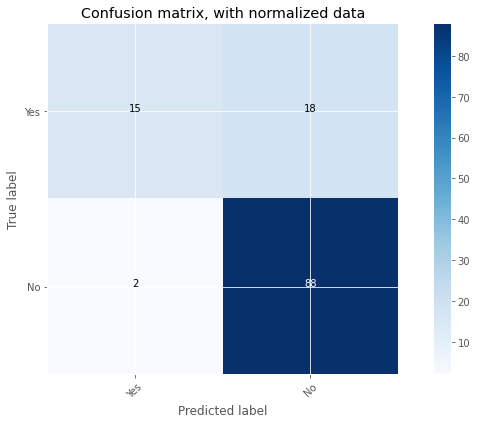

In [90]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],
                      title='Confusion matrix, with normalized data')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [56]:
# prediction on test set
pred_validation = model.predict(test)
# prediction
pred_validation[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [57]:
# Time for Classification Models
import time
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [59]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(x_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), 
                              columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(x_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(x_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

df_results = batch_classify(x_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.07 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 0.05 s
trained Gradient Boosting Classifier in 0.17 s
trained Decision Tree in 0.00 s
trained Random Forest in 0.04 s
trained Neural Net in 0.47 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.004978
2                    Linear SVM     0.997963       0.048940
5                 Random Forest     0.991853       0.040177
3  Gradient Boosting Classifier     0.883910       0.174128
0           Logistic Regression     0.808554       0.069272
7                   Naive Bayes     0.790224       0.004139
1             Nearest Neighbors     0.737271       0.005789
6                    Neural Net     0.582485       0.465917


### Avoiding Overfitting:

The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [60]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, x_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, x_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [61]:
# Log Reg performed best
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.798357
5,Rand FC,0.761759
4,Grad B CLF,0.745449
3,Dec Tree,0.696481
1,SVC,0.674136
6,Neural Classifier,0.641491
7,Naives Bayes,0.641491
2,KNN,0.627263


### Confusion Matrix:
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.

In [62]:
# Cross validate Log Reg Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=3)
from sklearn.metrics import accuracy_score
log_reg.fit(x_train, y_train)
print ("Logistic Regression Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Logistic Regression Classifier accuracy is 0.80


In [63]:
# test data
y_test_pred = cross_val_predict(log_reg, x_test, y_test, cv=3)
from sklearn.metrics import accuracy_score
log_reg.fit(x_test, y_test)
print ("Logistic Regression Classifier accuracy is %2.2f" % accuracy_score(y_test, y_test_pred))

Logistic Regression Classifier accuracy is 0.76


Confusion matrix
[[ 7 26]
 [ 4 86]]


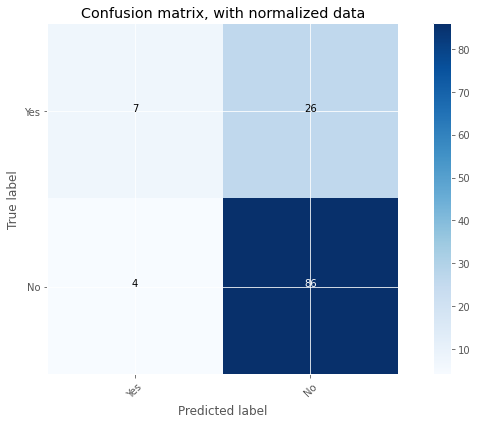

In [91]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],
                      title='Confusion matrix, with normalized data')

## Recall Precision Tradeoff:
- As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. 
- If there is an instance where the model believes that is 58% likely to be a loan approval then the model will classify it as a "No." 
- However, that instance was actually a "Yes" (potential client eligible for loan) 
- That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes".

In [67]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))
print('F1 Scroe:', f1_score(y_train, y_train_pred))

Precision Score:  0.784841075794621
Recall Score:  0.9668674698795181
F1 Scroe: 0.8663967611336033


### ROC Curve (Receiver Operating Characteristic):
- The ROC curve tells us how well our classifier is classifying between yes and no. 
- The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) 
- As the line moves the threshold of the classification changes giving us different values. 
- The closer is the line to our top left corner the better is our model separating both classes.

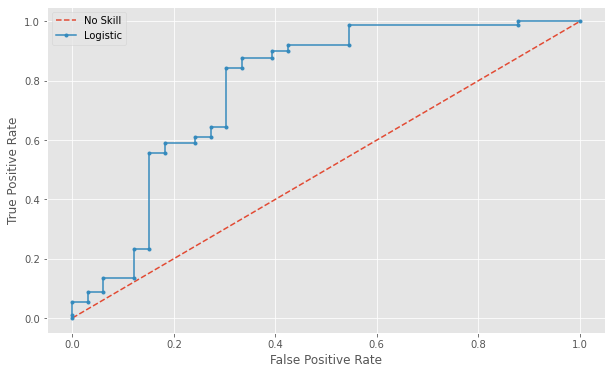

In [92]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# predict probabilities
yhat = model.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.851 auc=0.951


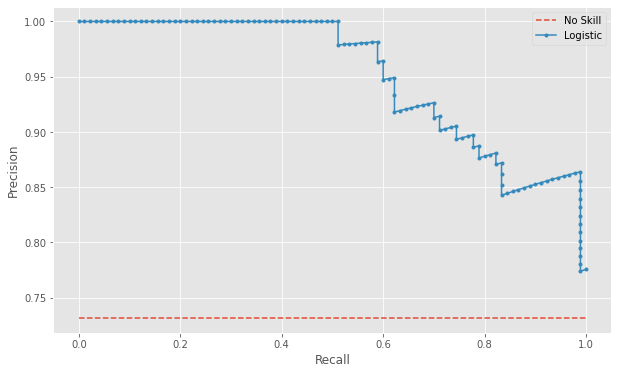

In [93]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# predict probabilities
lr_probs = log_reg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = log_reg.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_test_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [94]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('logistic', log_reg), ('randon', rand_clf), ('gradient', grad_clf)],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('randon',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_wei...
                                        

In [95]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, rand_clf, grad_clf, voting_clf):
    clf.fit(x_train, y_train)
    predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

LogisticRegression 0.8373983739837398
RandomForestClassifier 0.7967479674796748
GradientBoostingClassifier 0.7967479674796748
VotingClassifier 0.8211382113821138


## Domain specific Feature Engineering
- Total Income - Combining the Applicant Income and Coapplicant Income if the total income is high, chances of loan approval might also be high.
- Equated Monthly Installment
- Balance Income - This is the income left after the EMI has been paid. If this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

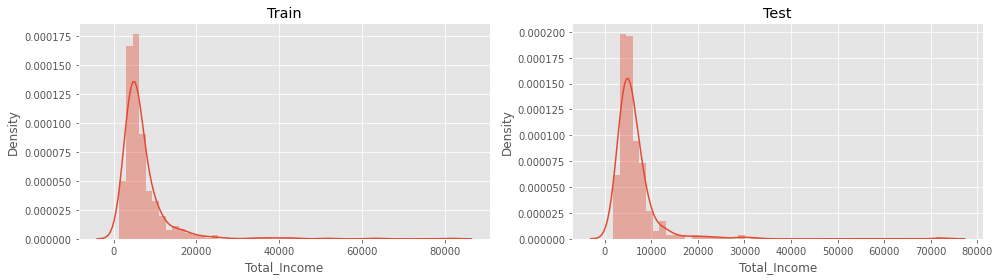

In [96]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")
plt.tight_layout()

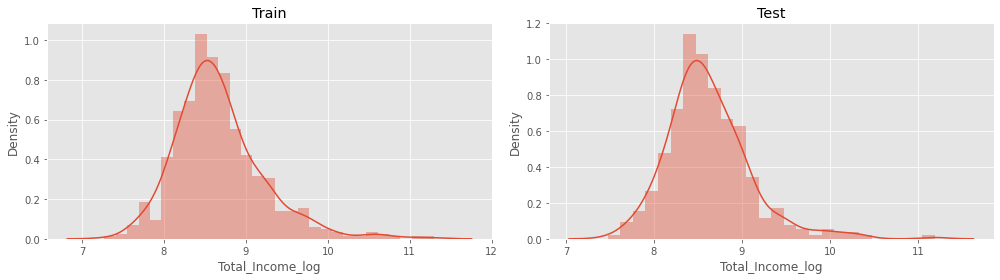

In [97]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")
plt.tight_layout()

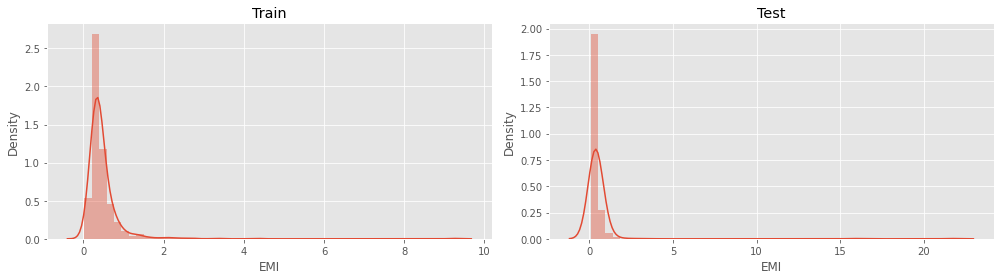

In [98]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")
plt.tight_layout()

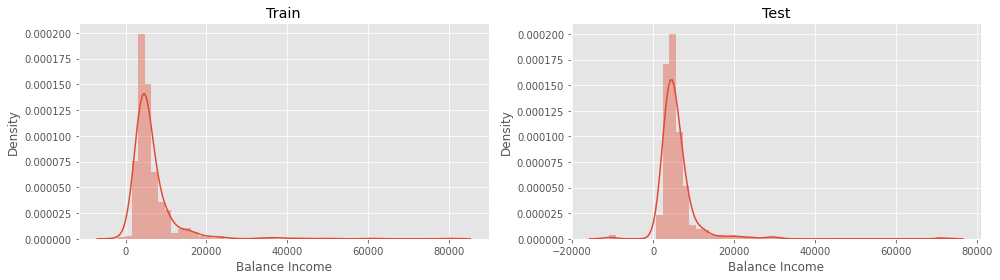

In [99]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")
plt.tight_layout()

In [100]:
# drop the variables to avoid multi-colinearity
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
train.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


# Model development

In [101]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 20), (123, 20), (491,), (123,))

In [103]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, x_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, x_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

# Log Reg performed best
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.771934
5,Rand FC,0.749526
3,Dec Tree,0.718939
0,Logistic Reg.,0.694461
1,SVC,0.672091
2,KNN,0.596788
6,Neural Classifier,0.556250
7,Naives Bayes,0.556250
